In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to /home/mohsen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mohsen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mohsen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mohsen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mohsen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
def preprocess_text(text):
    stop_words = nltk.corpus.stopwords.words('english')
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    return stemmed_text

In [4]:
data = pd.read_csv("tourist_accommodation_reviews.csv")
data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [5]:
data.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,49944,49944,49944,49944,49944
unique,49944,2344,25,537,49938
top,rn579778340,Reviewed 1 week ago,Patong,Sabai Sabai,We spent 6 of our 10 night-stay-dinners at thi...
freq,1,503,15112,200,2


In [8]:
hotel_names = data['Hotel/Restaurant name'].unique()
hotel_names.size

537

## The Best Areas from Luxury to Budget
#### 1)Phuket Town
#### 2)Karon
#### 3)Patong
#### 4)Kata
#### 5)Kamala
#### 6)Bang Tao Beach

In [9]:
best_areas = [' Phuket Town', ' Karon', ' Patong', ' Kata Beach', ' Kamala', ' Bang Tao Beach']
best_areas_df = data[data.Location.isin(best_areas)]
best_areas_df.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,32499,32499,32499,32499,32499
unique,32499,2142,6,352,32495
top,rn581307988,Reviewed 1 week ago,Patong,No.6 Restaurant,By far the most memorable and enjoyable dining...
freq,1,380,15112,200,2


In [10]:
df = []
for i in best_areas:
    selected_best_area_df = best_areas_df[best_areas_df.Location == i]
    selected_best_area_lst = selected_best_area_df['Hotel/Restaurant name'].unique()
    np.random.seed(len(selected_best_area_lst))
    randoms =np.random.choice(len(selected_best_area_lst), 5, replace=False)
    for j in randoms:
        df.append(selected_best_area_df[selected_best_area_df['Hotel/Restaurant name'] == selected_best_area_lst[j]])
df[0].head(5)

,ID,Review Date,Location,Hotel/Restaurant name,Review
32825,rn579781136,Reviewed 1 week ago,Phuket Town,Mee Ton Poe,This place serves great authentic Thai food at...
32826,rn579349931,Reviewed 1 week ago,Phuket Town,Mee Ton Poe,Just want to say awesome with all the food her...
32827,rn578001982,Reviewed 2 weeks ago,Phuket Town,Mee Ton Poe,We came here for lunch and ordered the chicken...
32828,rn576797260,Reviewed 2 weeks ago,Phuket Town,Mee Ton Poe,Food was good. The green cury nice and spice. ...
32829,rn564999946,"Reviewed March 6, 2018",Phuket Town,Mee Ton Poe,The reviews on the internet were good so I tri...


In [11]:
dept_emp_num =  data.groupby('Hotel/Restaurant name')['Hotel/Restaurant name'].count()
print(dept_emp_num)

Hotel/Restaurant name
+39 Italian Street Food              31
2gether Restaurant                  100
3 Spices Restaurant                 100
360 ° Bar                           100
44 Thaikitchen "KATA FOOD COURT"     83
                                   ... 
Ying Restaurant                     100
Yo Green Restaurant                 100
Yorkshire Hotel Restaurant          100
You and Me Patong                   100
i-Kroon Cafe                        100
Name: Hotel/Restaurant name, Length: 537, dtype: int64


In [12]:
sentiment = SentimentIntensityAnalyzer()

In [13]:
print(sentiment.polarity_scores('This movie is great!'))
print(sentiment.polarity_scores('This movie is not great!'))

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
{'neg': 0.473, 'neu': 0.527, 'pos': 0.0, 'compound': -0.5553}


In [14]:
for i in range(30):
    print(df[i].describe())


                 ID           Review Date      Location Hotel/Restaurant name  \
count            79                    79            79                    79   
unique           79                    75             1                     1   
top     rn579781136  Reviewed 1 week ago    Phuket Town           Mee Ton Poe   
freq              1                     2            79                    79   

                                                   Review  
count                                                  79  
unique                                                 79  
top     This place serves great authentic Thai food at...  
freq                                                    1  
                 ID                 Review Date      Location  \
count           100                         100           100   
unique          100                          93             1   
top     rn578698709  Reviewed November 3, 2016    Phuket Town   
freq              1               

                 ID                  Review Date         Location  \
count           100                          100              100   
unique          100                           93                1   
top     rn572760237  Reviewed December 23, 2015    Bang Tao Beach   
freq              1                            2              100   

        Hotel/Restaurant name  \
count                     100   
unique                      1   
top     Sugar Cane Restaurant   
freq                      100   

                                                   Review  
count                                                 100  
unique                                                100  
top     This restaurant is very popular with tourists ...  
freq                                                    1  
                 ID              Review Date         Location  \
count           100                      100              100   
unique          100                       80              

In [15]:
for i in range(30):
    df[i]['compound'] = [sentiment.polarity_scores(review)['compound'] for review in df[i]['Review']]
    df[i]['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df[i]['Review']]
    df[i]['neu'] = [sentiment.polarity_scores(review)['neu'] for review in df[i]['Review']]
    df[i]['pos'] = [sentiment.polarity_scores(review)['pos'] for review in df[i]['Review']]

/tmp/ipykernel_10371/1476063389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]['compound'] = [sentiment.polarity_scores(review)['compound'] for review in df[i]['Review']]
/tmp/ipykernel_10371/1476063389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df[i]['Review']]
/tmp/ipykernel_10371/1476063389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [16]:
df[5].head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
22205,rn580727542,Reviewed 4 days ago,Karon,We Cafe,The restaurant is very welcoming and clean. St...,0.8639,0.049,0.719,0.232
22206,rn575047740,Reviewed 4 weeks ago,Karon,We Cafe,A lovely place located between Chalong and Vic...,0.7269,0.000,0.858,0.142
22207,rn572569312,"Reviewed April 10, 2018",Karon,We Cafe,We eat here regularly as it’s so close to work...,-0.3182,0.146,0.731,0.122
22208,rn569819815,"Reviewed March 31, 2018",Karon,We Cafe,The food was excellent. That staff are very kn...,0.9308,0.000,0.518,0.482
22209,rn569603668,"Reviewed March 29, 2018",Karon,We Cafe,"Good selections of healthy food, coffee and fo...",0.6808,0.000,0.789,0.211


In [17]:
df[5][['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,100.000000,100.000000,100.000000,100.000000
mean,0.697824,0.024280,0.724570,0.251090
std,0.363094,0.041153,0.143141,0.143943
min,-0.823600,0.000000,0.368000,0.000000
25%,0.633300,0.000000,0.615250,0.129250
50%,0.848850,0.000000,0.730500,0.250000
75%,0.928525,0.045250,0.841500,0.341250
max,0.979500,0.184000,1.000000,0.632000


<AxesSubplot: xlabel='compound', ylabel='Count'>

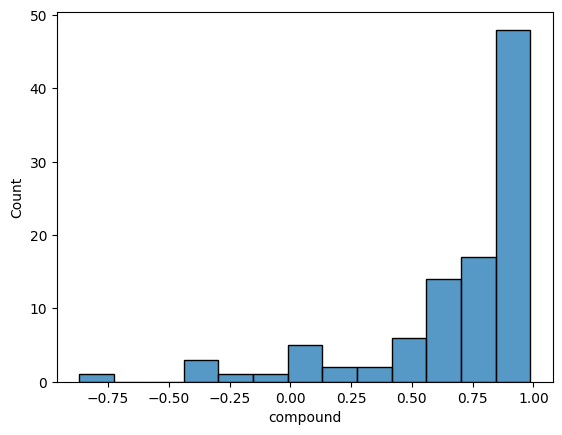

In [18]:
sns.histplot(df[7]['compound'])

<AxesSubplot: xlabel='pos', ylabel='Count'>

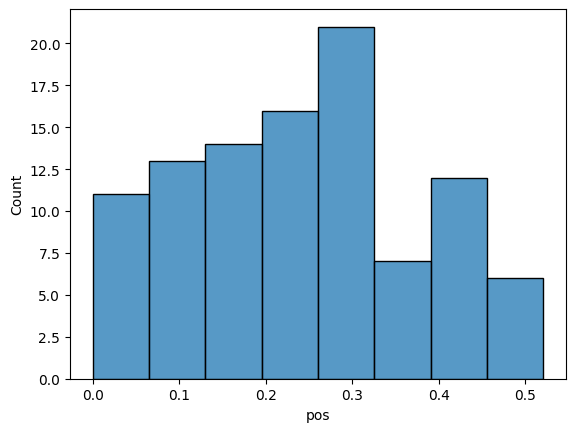

In [19]:
sns.histplot(df[20]['pos'])

<AxesSubplot: xlabel='neg', ylabel='Count'>

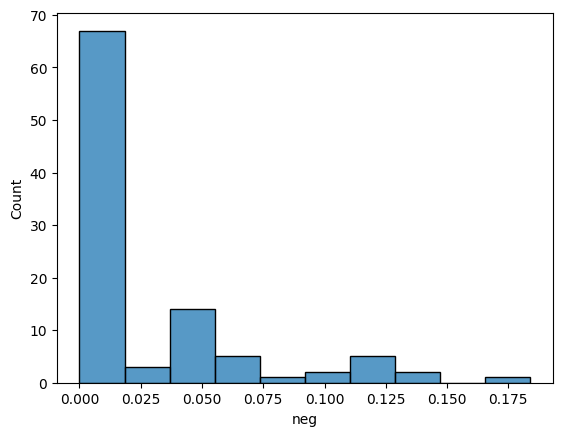

In [20]:
sns.histplot(df[5]['neg'])

In [21]:
(df[7]['compound']<=0).sum()

8

In [22]:
df[7]['Review'].count()

100

In [23]:
df_tmp = pd.DataFrame(columns=['Name', '% negetive reviews'])
df_tmp

,Name,% negetive reviews


In [24]:
d = {'Name': [df[0].iloc[0,3]], '% negetive reviews': [(df[1]['compound']<=0).sum()/df[1]['Review'].count()*100]}
df_tmp = pd.DataFrame(data=d)
df_tmp

,Name,% negetive reviews
0,Mee Ton Poe,7.0


In [25]:
df[0].iloc[0,3]

'Mee Ton Poe'

In [26]:
lst = []

# Create List of list
for i in range(30):
    lst.append([df[i].iloc[0,3], (df[i]['compound']<=0).sum()/df[i]['Review'].count()*100])

In [27]:
df_negative_percent = pd.DataFrame(lst, columns =['Name', '% negetive reviews'])
df_negative_percent

,Name,% negetive reviews
0,Mee Ton Poe,10.126582
1,Mr.Coffee,7.000000
2,Song Pee Nong 2,11.000000
3,Savoy Patong,19.000000
4,Mor Mu Dong,13.888889
5,We Cafe,8.000000
6,Baan Sailom Restaurant,15.714286
7,Schlusslicht,8.000000
8,Ying Restaurant,6.000000
9,Karlssons Restaurant Patong,7.000000


In [28]:
df_negative_percent.sort_values(by='% negetive reviews')

,Name,% negetive reviews
29,Riverside Restaurant,4.000000
13,Austrian Garden Restaurant,4.878049
28,Catch Beach Club,5.000000
12,Oriental Spoon,5.000000
19,Mom Tri's Kitchen at Villa Royale,5.000000
20,Grill Bill,5.000000
22,Hey Ha Bar & Restaurant,5.882353
21,Oiy Restaurant,5.970149
8,Ying Restaurant,6.000000
17,Burger House Kata Beach,6.000000


<AxesSubplot: xlabel='% negetive reviews', ylabel='Name'>

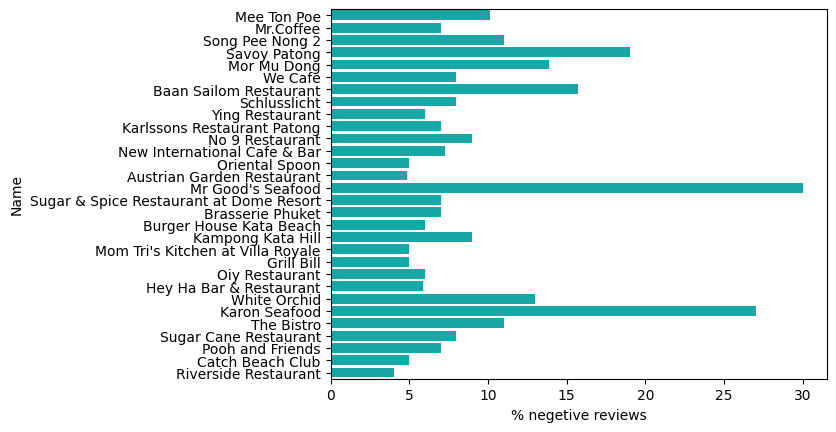

In [29]:
sns.barplot(data=df_negative_percent, x='% negetive reviews', y=df_negative_percent.Name, color='c', orient='h')

In [30]:
selected_df = pd.DataFrame()
selected_df = pd.concat([selected_df, df[14]])
selected_df

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
52080,rn581042046,Reviewed 2 days ago,Patong,Mr Good's Seafood,Food OK but not at the level I expected. I may...,0.9391,0.000,0.687,0.313
52081,rn578210903,Reviewed 2 weeks ago,Patong,Mr Good's Seafood,This placed is popular and cheap. Sit inside f...,0.7650,0.000,0.847,0.153
52082,rn577593253,Reviewed 2 weeks ago,Patong,Mr Good's Seafood,Absolutely pleasant and professional staff. Fo...,0.8395,0.000,0.784,0.216
52083,rn575193188,Reviewed 3 weeks ago,Patong,Mr Good's Seafood,Very tasty food and fresh seafood! We ate here...,0.6892,0.000,0.847,0.153
52084,rn572362431,"Reviewed April 10, 2018",Patong,Mr Good's Seafood,A great Thai/Chinese restaurant with fresh fis...,0.8955,0.000,0.640,0.360
...,...,...,...,...,...,...,...,...,...
52175,rn343937305,"Reviewed January 31, 2016",Patong,Mr Good's Seafood,I'll make this brief and concise.\r\nWe came h...,-0.7604,0.158,0.842,0.000
52176,rn337753805,"Reviewed January 5, 2016",Patong,Mr Good's Seafood,Mr good : went there as I read reviews on trip...,0.7876,0.050,0.729,0.221
52177,rn336560420,"Reviewed January 1, 2016",Patong,Mr Good's Seafood,Where as the food here isn't bad it also isn't...,0.5298,0.072,0.764,0.165
52178,rn332398447,"Reviewed December 13, 2015",Patong,Mr Good's Seafood,A friend an I enjoyed a fantastic sea food fea...,0.9741,0.000,0.521,0.479


In [31]:
selected_df['processed_review'] = selected_df['Review'].apply(preprocess_text)
positive_review = selected_df.loc[selected_df['compound']>0,:]
negative_review = selected_df.loc[selected_df['compound']<=0,:]
negative_review.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
52086,rn570077263,"Reviewed April 1, 2018",Patong,Mr Good's Seafood,It looked authentic from the outside so we wal...,-0.0772,0.069,0.868,0.063,"[look, authent, outsid, walk, food, tasteless,..."
52088,rn568441900,"Reviewed March 24, 2018",Patong,Mr Good's Seafood,Fish ( Red Snapper ) was ordered with Red Curr...,-0.7783,0.238,0.762,0.000,"[fish, red, snapper, order, red, curri, souc, ..."
52093,rn551734815,"Reviewed January 5, 2018",Patong,Mr Good's Seafood,Think negative reviews are based on preconceiv...,0.0000,0.079,0.808,0.113,"[think, neg, review, base, preconceiv, expect,..."
52096,rn544385644,"Reviewed December 1, 2017",Patong,Mr Good's Seafood,"On 25th Nov 2017, Poor service and a bad exper...",-0.7642,0.226,0.648,0.125,"[25th, nov, 2017, poor, servic, bad, experi, p..."
52097,rn540656717,"Reviewed November 13, 2017",Patong,Mr Good's Seafood,Because of this place my friends I and spent a...,-0.2911,0.183,0.637,0.180,"[place, friend, spent, day, hospit, treat, sev..."


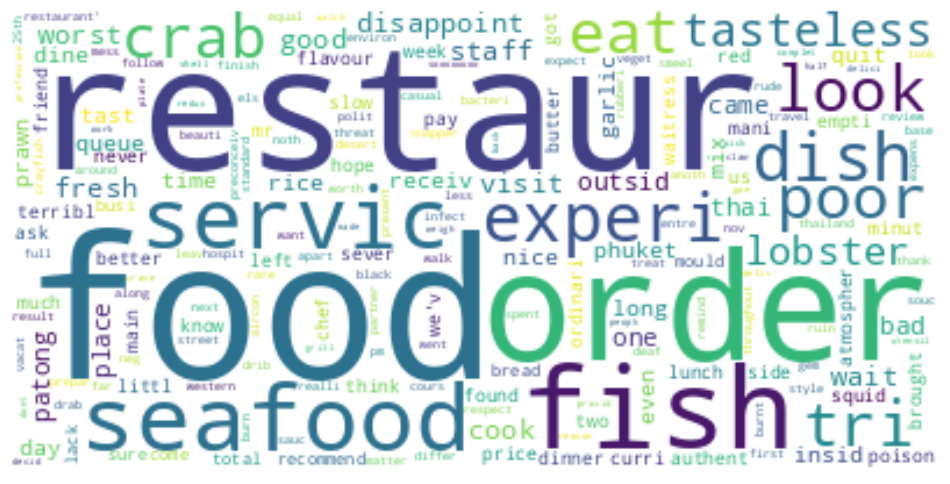

In [32]:
neg_tokens = [word for review in negative_review['processed_review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

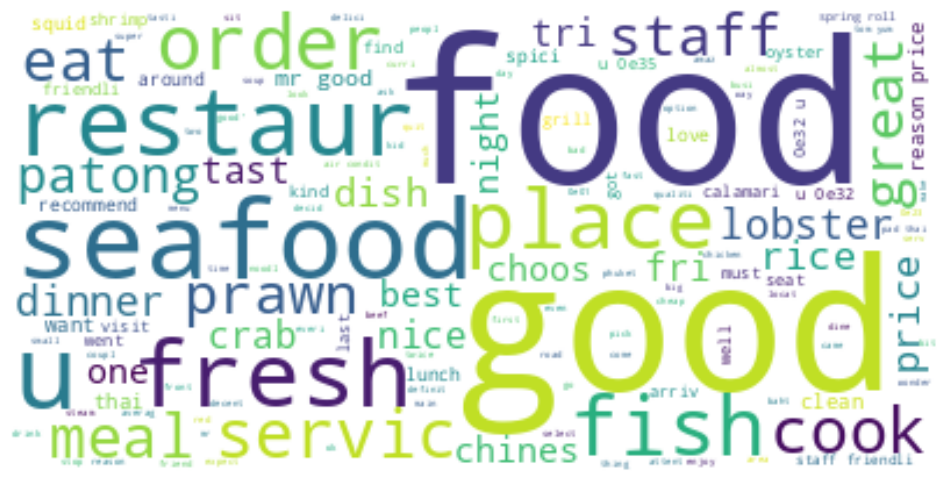

In [33]:
pos_tokens = [word for review in positive_review['processed_review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [48]:
from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

   food restaur   order    fish seafood  servic  experi    dish    look    poor 
     18      14      12      10       8       8       7       7       6       6 


In [49]:
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

   good    food       u seafood restaur   fresh   place    fish   price   order 
     42      40      37      29      21      20      19      18      17      17 


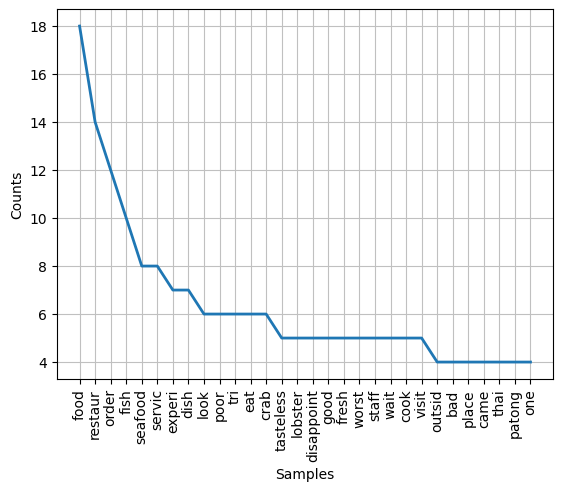

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [50]:
neg_freqdist.plot(30)

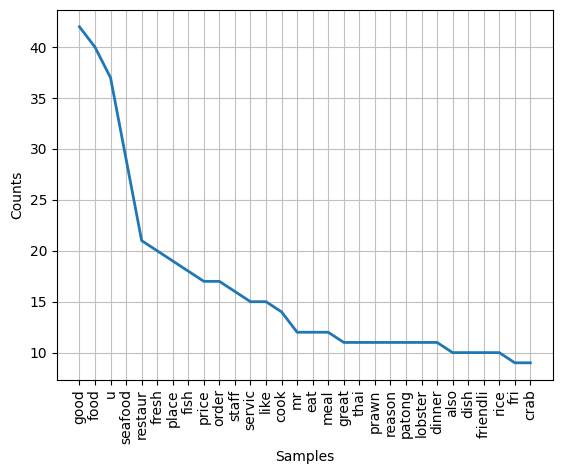

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [51]:
pos_freqdist.plot(30)

## TEXT MINING

In [34]:
df_30 = pd.DataFrame()
for i in range(30):
    df_30 = pd.concat([df_30, df[i]])
df_30

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
32825,rn579781136,Reviewed 1 week ago,Phuket Town,Mee Ton Poe,This place serves great authentic Thai food at...,0.7506,0.000,0.870,0.130
32826,rn579349931,Reviewed 1 week ago,Phuket Town,Mee Ton Poe,Just want to say awesome with all the food her...,0.8097,0.000,0.755,0.245
32827,rn578001982,Reviewed 2 weeks ago,Phuket Town,Mee Ton Poe,We came here for lunch and ordered the chicken...,0.4951,0.049,0.837,0.114
32828,rn576797260,Reviewed 2 weeks ago,Phuket Town,Mee Ton Poe,Food was good. The green cury nice and spice. ...,0.7717,0.000,0.765,0.235
32829,rn564999946,"Reviewed March 6, 2018",Phuket Town,Mee Ton Poe,The reviews on the internet were good so I tri...,-0.8649,0.254,0.687,0.059
...,...,...,...,...,...,...,...,...,...
10603,rn468321711,"Reviewed March 18, 2017",Bang Tao Beach,Riverside Restaurant,We have been coming here on and off for the pa...,0.9509,0.000,0.641,0.359
10604,rn467740074,"Reviewed March 16, 2017",Bang Tao Beach,Riverside Restaurant,We came to the Riverside last year when it was...,0.8591,0.000,0.812,0.188
10605,rn464212337,"Reviewed March 2, 2017",Bang Tao Beach,Riverside Restaurant,We ate here a couple of times and the food is ...,0.8828,0.000,0.773,0.227
10606,rn461924534,"Reviewed February 22, 2017",Bang Tao Beach,Riverside Restaurant,My husband and I ate there today and the food ...,0.8585,0.000,0.689,0.311


In [35]:
len(df_30)

2851

In [36]:
df_30['compound'] = [sentiment.polarity_scores(review)['compound'] for review in df_30['Review']]
df_30['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df_30['Review']]
df_30['neu'] = [sentiment.polarity_scores(review)['neu'] for review in df_30['Review']]
df_30['pos'] = [sentiment.polarity_scores(review)['pos'] for review in df_30['Review']]
df_30

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
32825,rn579781136,Reviewed 1 week ago,Phuket Town,Mee Ton Poe,This place serves great authentic Thai food at...,0.7506,0.000,0.870,0.130
32826,rn579349931,Reviewed 1 week ago,Phuket Town,Mee Ton Poe,Just want to say awesome with all the food her...,0.8097,0.000,0.755,0.245
32827,rn578001982,Reviewed 2 weeks ago,Phuket Town,Mee Ton Poe,We came here for lunch and ordered the chicken...,0.4951,0.049,0.837,0.114
32828,rn576797260,Reviewed 2 weeks ago,Phuket Town,Mee Ton Poe,Food was good. The green cury nice and spice. ...,0.7717,0.000,0.765,0.235
32829,rn564999946,"Reviewed March 6, 2018",Phuket Town,Mee Ton Poe,The reviews on the internet were good so I tri...,-0.8649,0.254,0.687,0.059
...,...,...,...,...,...,...,...,...,...
10603,rn468321711,"Reviewed March 18, 2017",Bang Tao Beach,Riverside Restaurant,We have been coming here on and off for the pa...,0.9509,0.000,0.641,0.359
10604,rn467740074,"Reviewed March 16, 2017",Bang Tao Beach,Riverside Restaurant,We came to the Riverside last year when it was...,0.8591,0.000,0.812,0.188
10605,rn464212337,"Reviewed March 2, 2017",Bang Tao Beach,Riverside Restaurant,We ate here a couple of times and the food is ...,0.8828,0.000,0.773,0.227
10606,rn461924534,"Reviewed February 22, 2017",Bang Tao Beach,Riverside Restaurant,My husband and I ate there today and the food ...,0.8585,0.000,0.689,0.311


In [37]:
df_30['Label'] = df_30['compound'].apply(lambda x: 'Good' if x > 0 else 'Bad')
df_30

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,Label
32825,rn579781136,Reviewed 1 week ago,Phuket Town,Mee Ton Poe,This place serves great authentic Thai food at...,0.7506,0.000,0.870,0.130,Good
32826,rn579349931,Reviewed 1 week ago,Phuket Town,Mee Ton Poe,Just want to say awesome with all the food her...,0.8097,0.000,0.755,0.245,Good
32827,rn578001982,Reviewed 2 weeks ago,Phuket Town,Mee Ton Poe,We came here for lunch and ordered the chicken...,0.4951,0.049,0.837,0.114,Good
32828,rn576797260,Reviewed 2 weeks ago,Phuket Town,Mee Ton Poe,Food was good. The green cury nice and spice. ...,0.7717,0.000,0.765,0.235,Good
32829,rn564999946,"Reviewed March 6, 2018",Phuket Town,Mee Ton Poe,The reviews on the internet were good so I tri...,-0.8649,0.254,0.687,0.059,Bad
...,...,...,...,...,...,...,...,...,...,...
10603,rn468321711,"Reviewed March 18, 2017",Bang Tao Beach,Riverside Restaurant,We have been coming here on and off for the pa...,0.9509,0.000,0.641,0.359,Good
10604,rn467740074,"Reviewed March 16, 2017",Bang Tao Beach,Riverside Restaurant,We came to the Riverside last year when it was...,0.8591,0.000,0.812,0.188,Good
10605,rn464212337,"Reviewed March 2, 2017",Bang Tao Beach,Riverside Restaurant,We ate here a couple of times and the food is ...,0.8828,0.000,0.773,0.227,Good
10606,rn461924534,"Reviewed February 22, 2017",Bang Tao Beach,Riverside Restaurant,My husband and I ate there today and the food ...,0.8585,0.000,0.689,0.311,Good


In [38]:
df_30_reduced = df_30[['Review','Label']]
df_30_reduced

,Review,Label
32825,This place serves great authentic Thai food at...,Good
32826,Just want to say awesome with all the food her...,Good
32827,We came here for lunch and ordered the chicken...,Good
32828,Food was good. The green cury nice and spice. ...,Good
32829,The reviews on the internet were good so I tri...,Bad
...,...,...
10603,We have been coming here on and off for the pa...,Good
10604,We came to the Riverside last year when it was...,Good
10605,We ate here a couple of times and the food is ...,Good
10606,My husband and I ate there today and the food ...,Good


In [39]:
print(df_30_reduced.groupby('Label').count())

       Review
Label        
Bad       273
Good     2578


In [40]:
df_30_reduced['processed_review'] = df_30_reduced['Review'].apply(preprocess_text)
df_30_preprocessed = df_30_reduced[['processed_review','Label']]
df_30_preprocessed.head()

/tmp/ipykernel_10371/4240257228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30_reduced['processed_review'] = df_30_reduced['Review'].apply(preprocess_text)


,processed_review,Label
32825,"[place, serv, great, authent, thai, food, reas...",Good
32826,"[want, say, awesom, food, realli, enjoy, good,...",Good
32827,"[came, lunch, order, chicken, curri, spici, to...",Good
32828,"[food, good, green, curi, nice, spice, noodl, ...",Good
32829,"[review, internet, good, tri, believ, bad, tri...",Bad


In [41]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_30_preprocessed['processed_review'].map(' '.join))
X = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

X.head()

,00,000,0080,0081,0082,0083,0085,0087,0089,008a,...,yummi,yummmmmi,zealand,zero,zimmerman,zimmern,zinger,zone,zoo,zufrieden
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.model_selection import train_test_split

y = df_30_preprocessed['Label']

X_train, X_test, y_trian, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=99)

<AxesSubplot: xlabel='Label', ylabel='count'>

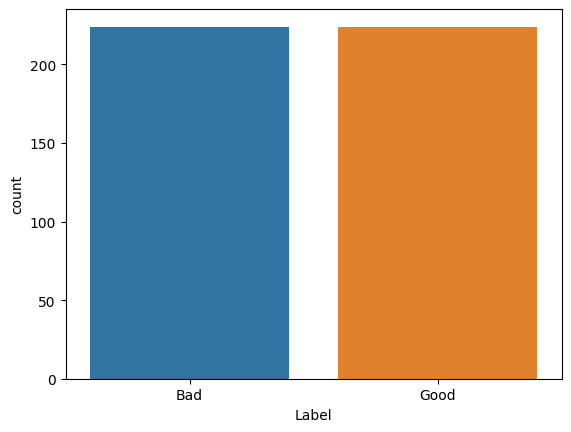

In [43]:
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_trian)

sns.countplot(x=y_train_undersampled)

In [44]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_undersampled, y_train_undersampled)

MultinomialNB()

MultinomialNB()

In [45]:
y_pred = model.predict(X_test)

In [46]:
from sklearn import metrics

acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm, '\n\n')
print('-------------------------------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.83


Confusion Matrix:
[[ 34  15]
 [ 81 441]] 


-------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

         Bad       0.30      0.69      0.41        49
        Good       0.97      0.84      0.90       522

    accuracy                           0.83       571
   macro avg       0.63      0.77      0.66       571
weighted avg       0.91      0.83      0.86       571

